### **TAREA 10**

El propósito de esta tarea es ejercitar e integrar los temas vistos en la materia. Se debe seguir los pasos detallados en cada inciso de la misma.

**IMPORTANTE**
- La tarea debe entregarse en este archivo, completando las celdas de código correspondientes.
- El código que incorpores *debe* poder ejecutarse en *este* Colab, en caso contrario el ejercicio ***será inválido***. Por favor,  verificá que el código se ejecute sin errores (aún en el caso en que la solución no sea del todo correcta).
- Al clicar "Ejecutar celda" (el triangulito blanco) en las celdas donde están los test deberían devolverse los resultados correctos.


**IMPORTANTE 2**
- Escribí las pre y post condiciones.
- Incluí `assert` para comprobar el buen tipado del argumento y el cumplimiento de la precondición.
- No olvides organizar tu programa incluyendo comentarios, espacios y sangrías de manera adecuada. 
- Seguí las convenciones respecto de nombres de variables, funciones y constantes.

El sitio www.gutemberg.org, es un sitio con miles de libros gratis, en ingles la mayoría, de público acceso. El libro elegido para esta tarea es  *Cuentos de Amor de Locura y de Muerte*, de Horacio Quiroga. 

**Ejercicio 1.** 

1. Leer el archivo de texto del libro Cuentos de Amor de Locura y de Muerte de Proyecto Gutenberg, https://www.gutenberg.org/cache/epub/13507/pg13507.txt, con la biblioteca `requests`. Acceder al contenido del mismo con la función `.text` y guardarla en la variable `test`. Después imprimir los primeros 1000 carcateres del texto.

In [ ]:
import requests
response = requests.get("https://www.gutenberg.org/cache/epub/13507/pg13507.txt")
test = response.text
print(test[:1000])

El verdadero libro (se puede ver en la impresión) comienza en la string `#Cuentos de Amor de Locura y de Muerte#`. Recorriendo el archivo que se puede bajar del Proyecto Gutenberg, se puede observar que el contenido del libro termina en la cadena `FIN` (que afortunadamente tiene una única ocurrencia). Luego viene información sobre el Proyecto Gutenberg. 

2. Modificar la variable `test` para que guarde solo el contenido del libro.
3. El texto presenta mayúsculas y minúsculas, para unificar criterios y poder trabajar en el resto del cuaderno, transformar en minúsculas las palabras del texto. Y guardarlo en la variable `texto_minuscula`.  

In [44]:
k_ini, k_fin = test.find('#Cuentos de Amor de Locura y de Muerte#'), test.find('FIN')
test = test[k_ini:k_fin]
texto_minuscula = test.lower()

4. Para poder analizar la frecuencia, la cantidad de veces que se repite un elemento, de un caracter o una palabra, eliminamos los caracteres que no sean alfanuméricos de cada palabra del `texto_minuscula`. Guardar en la variable `texto_minuscula_1`. Los caracteres a eliminar son  `( ) , . _ : ; - ' [ ] ¡ ! ¿ ? * $ % & / \ #`.


In [43]:
texto_minuscula_1 = texto_minuscula
caracteres = "(),._:;-'[]¡¿!?*$%&/#\""

for x in range(len(caracteres)):
    texto_minuscula_1 = texto_minuscula_1.replace(caracteres[x],"")

**Ejercicio 2.** Contar la frecuencia alfanumérica, mediante un diccionario. Para ello definir la función `check_freq()` que recibe como parametro una cadena y devuelva un dicionario cuyas claves son los caracteres del parametro cadena y dada una clave,  el  valor  es la frecuencia,  es decir cantidad de veces que aparece el caracter en la cadena.
Aplicar la función a la variable `texto_minuscula_1`.

In [ ]:
def check_freq(x):
    freq = {}
    for c in set(x):
       freq[c] = x.count(c)
    return freq

check_freq(texto_minuscula_1)

Comparar los resultados obtenido con el archivo de texto original. Para realizar esto en la página https://www.gutenberg.org/cache/epub/13507/pg13507.txt, presionar en el teclado las teclas "Ctrl+f", aparecerá en el margen superior derecho de la pantalla una barra interactiva donde uno ingresa en este caso un caracter y cuenta la cantidad de veces que aparece el mismo en la página. Ingresar caracter por caracter y corroborar los resultados obtenidos.

**GENERACION DE GRAFICOS**

Importar `WordCloud` del módulo `wordcloud`.

El módulo `WordCloud` sirve para generar una nube de palabras. Una *nube de palabras* o *nube de etiquetas* es una representación visual de las palabras que conforman un texto, en donde el tamaño es mayor para las palabras que aparecen con más frecuencia.

 Para mayor información sobre el módulo `wordcloud` dirigirse a https://github.com/amueller/word_cloud. 

Hay un ejemplo simple del uso de WorldCloud en  https://github.com/amueller/word_cloud/blob/master/examples/simple.py y  muchísimos más ejemplos en https://github.com/amueller/word_cloud/tree/master/examples


In [5]:
from wordcloud import WordCloud

Las *stop words* o *palabras vacías* es el nombre que reciben las palabras "sin significado" como artículos, pronombres, preposiciones, etc. que son filtradas antes o después del procesamiento de datos en lenguaje natural (texto). Este concepto se extiende apalabras muy utilizadas y que no aportan mucho a un texto literario. Para hacer nube de etiquetas es conveniente eliminar las palabras vacías, pues en caso contrario las palabras más utilizadas pueden no ser las palabras más significativas. 

En  https://github.com/Alir3z4/stop-words podrán encontrar listas de palabras vacías en diferentes idiomas.

**Ejercicio 3.** Con el módulo `requests` bajar la lista de palabras vacías en español y asignar a la variable `palabras_vacias_es` el conjunto de palabras vacías en español.

Observar que cuando se baja el archivo directamente obtenemos código HTML. Como en este cuaderno no queremos trabajar con código HTML (por simplicidad) podemos bajar el archivo en su versión *raw* (cruda o crudo):

https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt

In [47]:
response = requests.get("https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt")
pal_v = response.text.strip() + '\n'

In [48]:
palabras_vacias_es = set()

k = pal_v.find('\n')
while k > -1:
    # print(pal_v[:k].strip())
    palabras_vacias_es.add(pal_v[:k].strip())
    pal_v = pal_v[k:].strip()
    k = pal_v.find('\n')

**Ejercicio 4.** Con el uso de WordCloud generar un "grafico de nube de palabras", del texto contenido en la variable `texto_minuscula_1`. El gráfico se almacenará en el objeto `libro_wc` de tipo `WordCloud`. Lo  generaremos con el color de fondo blanco.  

In [49]:
# instantiate a word cloud object
libro_wc = WordCloud(
    background_color='white',
    stopwords=palabras_vacias_es
)

# generate the word cloud
libro_wc.generate(texto_minuscula_1)

Importar el módulo `matplotlib.pyplot` como `plt`, para dibijar el gráfico con los siguiente parametros:

- Tamaño de la imagen = 16.0 de ancho, 9.0 de alto.
- Interpolación = bilinear.
- Ejes de coordenadas invisibles (por defecto `pyplot` dibuja el eje `x` y  el  eje `y` con alguna escala).

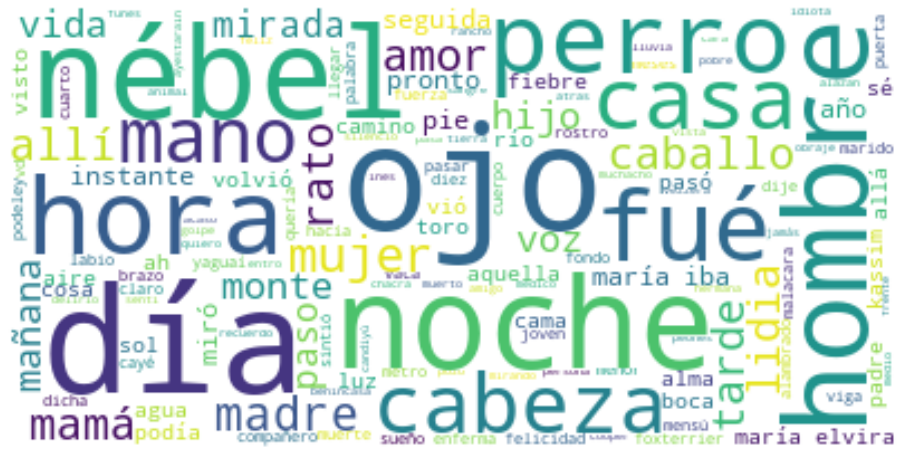

In [50]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 9.0)
# display the word cloud
plt.imshow(libro_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Generar nuevamente el gráfico. Añadir al formato del mismo la opción `inferno` en el parametro `color_map` de la clase `WordCloud`.

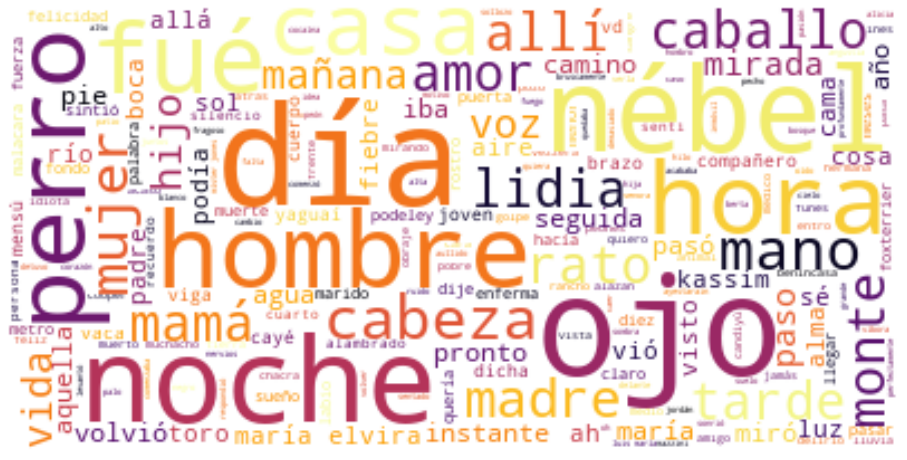

In [51]:
libro_wc = WordCloud(
    background_color='white',
    stopwords=palabras_vacias_es, 
    colormap=plt.cm.inferno
)
libro_wc.generate(texto_minuscula_1)
plt.rcParams['figure.figsize'] = (16.0, 9.0)
# display the word cloud
plt.imshow(libro_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**Ejercicio 5.** A continuación se pedira realizar el grafico de  "nube de palabras" dentro de una mascara, figura en particular. Para eso importamos los módulos `numpy` como `np` y del módulo `PIL` importamos la función `Image`. 

*Observación.* Python Imaging Library (PIL) es una librería gratuita que permite la edición de imágenes directamente desde Python. Soporta una variedad de formatos, incluídos los más utilizados como GIF, JPEG y PNG. Una gran parte del código está escrito en C, por cuestiones de rendimiento.

In [52]:
import numpy as np
from PIL import Image

Accedemos a la mascara en cuestión. Es el archivo 'perro.png' que subimos con la tarea.

Usando  la función `Image` de `PIL` podemos transformar la imagen en un `ndarray` de `numpy`. Alamacenaremos este array en la variable `imagen`. En este caso el resultado es  es un arreglo 2-dimensional (lista de listas) donde los valores en las listas interiores son números enteros que indican diferente niveles de grises: `0` es negro y `255` es blanco. 


In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# imagen = np.array(Image.open("/content/drive/Shareddrives/Algoritmos y Programacion/2022-1/Tareas/imagenes/perro.png"))
imagen = np.array(Image.open("/content/drive/Shareddrives/Algoritmos y Programacion/2022-1/Tareas/imagenes/facundo_quiroga.png"))
print(imagen.shape)
# print(imagen[100,:])
img = imagen[:,:,0] + imagen[:,:,1] + imagen[:,:,2] + imagen[:,:,3]
print(img[200,:])

(768, 545, 4)
[ 58 254 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253 253
 253 253 253 253 253 253 253 253 253 253 253 253   0   8 218  25 145 234
 161 218 179 158 100 227 130 112 109 123 149 147 125 132 127 109 109 125
 121 102  98  92  85  84  83  73  56  47  62  69  79  75  65  55  48  48
  49  30  25  33  36  28  35  51  40  35  28  24  34  52  73  90  87  93
  93  84  67  61  61  67  87  77  66  66  77  90 101 104 113 109 105 102
 102 106 112 116 117  99  87  82  54  29  27  48  40  37  40  37  38  38
  33  33  59  59  56  51  48  42  38  38   8  22  57  92  88  56  50  63
  70  65  69  81  93  87  67  49  69  54  41  37  44  50  49  43  75  73
  70  63  56  48  37  31  33  27  24  17  17  25  36  45  37  43  50  53
  45  48  60  74  48  45  45  48  56  59  53  46  47  37  41  56  59  46
  43  61  52  62  81  94  97  92  76  67  79  79  83  97 110 112 103  88
 108 107 106  98  84  69  53  43  50  47  40  31  26  26  27  29  29  48
  81  95  94  83  65  56  69  81  90 

Imprima la imagen a partir de la variable `imagen` y  verá la carra de un perro (los colores originales se han perdido). 

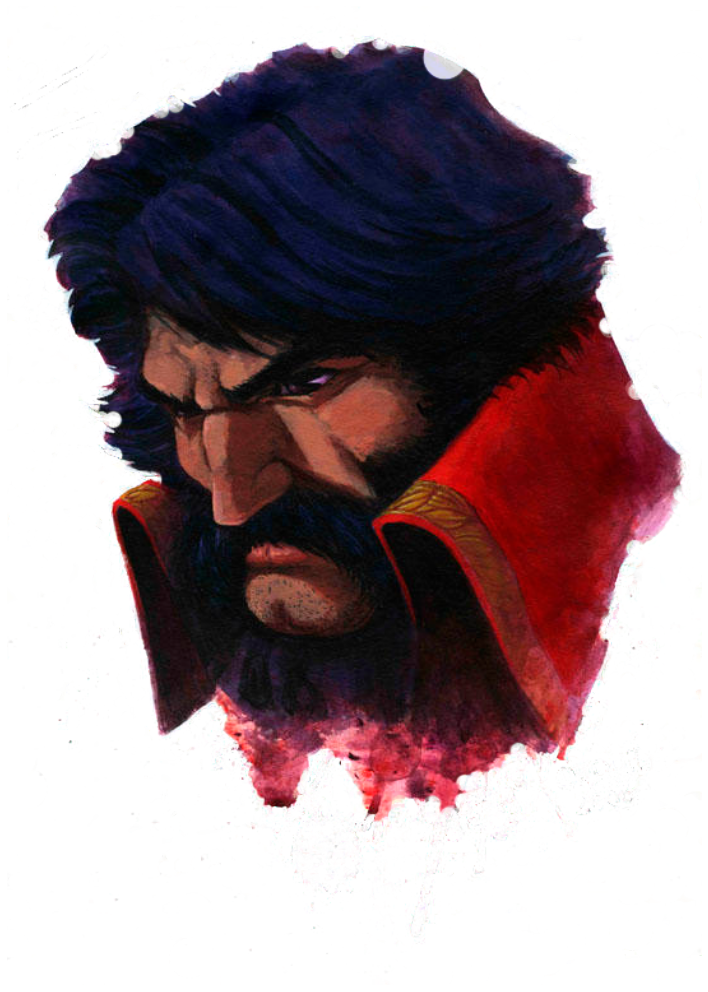

In [90]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
plt.imshow(imagen, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Convertir la imagen en una verdadera "máscara" con fondo blanco y todo los demás negro. 

In [74]:
imagen1 = imagen.copy()
imagen1[imagen1 > 0] =  1
imagen1[imagen1 == 0] = 255
imagen1[imagen1 == 1] = 0
mascara = imagen1.copy()

Imprimimos la mascara con los siguientes parametros:

- Ancho = 14.

- Alto = 18.

- Interpolación = bilinear.

- Ejes cartesianos invisibles.

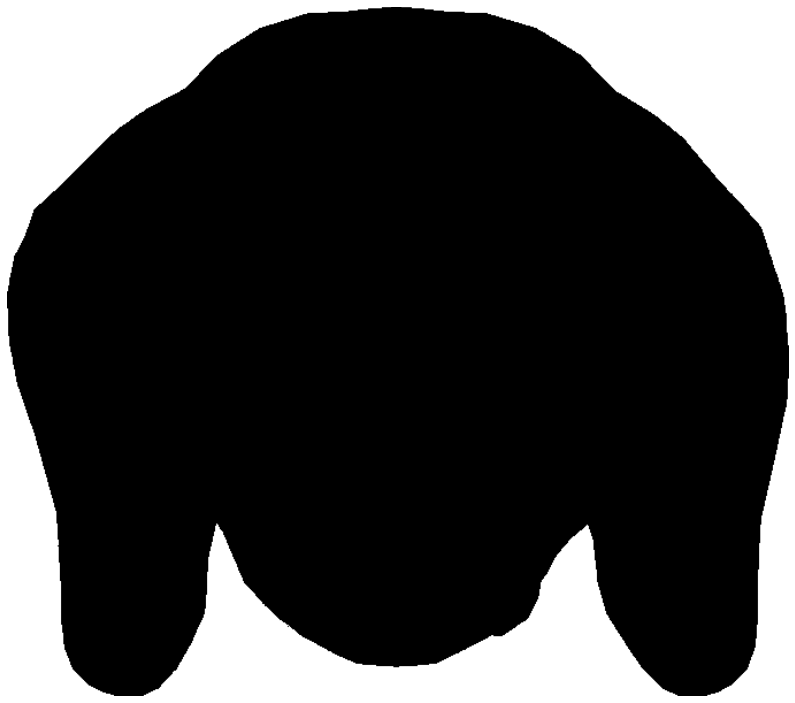

In [75]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
plt.imshow(mascara, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Generar el grafico de "nubes de palabras" con la máscara `mascara` con los siguientes parametros:

- Color del fondo = blanco.

- Contorno de la mascara visibles.

- Incluir las stopwords, incluida la palabra said.

- Ancho = 14.

- Alto = 18.

- Interpolación = bilinear.

- Ejes cartesianos invisibles.

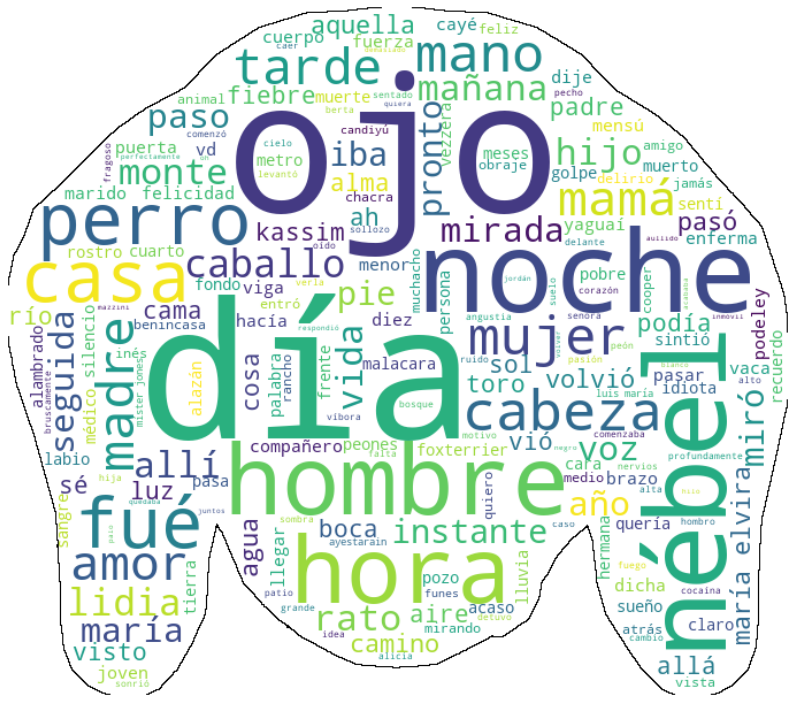

In [76]:
# instantiate a word cloud object
libro_wc2 = WordCloud(background_color='white' , mask=mascara,contour_width=1, stopwords=palabras_vacias_es)
# generate the word cloud
libro_wc2.generate(texto_minuscula_1)
# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
plt.imshow(libro_wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

##ANALISIS DE FRECUENCIA DE PALABRAS

El objetivo de ésta parte es analizar la frecuencia, cantidad de veces que se repite un elemento, de las palabras de la variable `texto_minuscula_1` y graficar los resultados obtenidos.

**Ejercicio 5.** En este ejercicio deberás

1. Dividir el texto de la variable `texto_en_minuscula_1` en palabras y  almacenarlas  en la lista `palabras` (puede haber palabas repetidas).
2. Contar la cantidad de palabras almacendas  e imprimir esa cantidad en pantalla.
3. Definir la función `contar_palabras` que recibe una lista de palabras  y calcula la frecuencia (la cantidad de veces que se repite una misma palabra en la lista). La función `contar_palabras` debe devolver un diccionario cuyas claves son las palabras y sus respectivos valores la frecuencia de las mismas. Imprimir la cantidad de palabrás únicas en el texto.
4. Crear el conjunto `uni_palabras` que tiene todas las palabras del texto.
5. Eliminar las palabras que pertenezcan a las palabras vacías y guardarlas en la la lista `palabras_sin_stopwords`.
6. Utilizar la función `contar_palabras()` definida anteriormente, para generar un diccionario llamado `frec_palabras_sin_stopwords`cuyas claves son las palabras de `palabras_sin_stopwords`  y los valores la frecuencia de cada palabra en el texto.

In [77]:
# 1.
palabras = texto_minuscula_1.split()

# 2. 
print('Cantidad total de palabras:', len(palabras))

# 3.
def contar_palabras(lista_palabras):
   dic={}
   for x in lista_palabras:
       if not x in  dic:        
          dic[x] = lista_palabras.count(x)
   return dic
dic = contar_palabras(palabras)
print('Cantidad total de palabras únicas:',len(dic))


Cantidad total de palabras: 49180
Cantidad total de palabras únicas: 8747


In [79]:
# 4. 
uni_palabras = set(palabras) # alternativamente,  uni_palabras = list(dic.keys())

# 5. 
palabras_sin_stopwords = []
for palabra in palabras:
    if  palabra not in palabras_vacias_es:
        palabras_sin_stopwords.append(palabra)
print('Cantidad total de palabras no vacías:',len(palabras_sin_stopwords))

# 6.
frec_palabras_sin_stopwords = contar_palabras(palabras_sin_stopwords)
print(frec_palabras_sin_stopwords)

Cantidad total de palabras no vacías: 21436
{'cuentos': 2, 'amor': 61, 'locura': 7, 'muerte': 23, 'horacio': 1, 'quiroga': 1, '1917': 1, 'indice': 1, 'estación': 4, 'ojos': 147, 'sombríos': 4, 'solitario': 8, 'isolda': 3, 'infierno': 4, 'artificial': 6, 'gallina': 5, 'degollada': 2, 'buques': 6, 'suicidantes': 2, 'almohadón': 7, 'pluma': 3, 'perro': 40, 'rabioso': 18, 'deriva': 5, 'insolación': 1, 'alambre': 13, 'púa': 10, 'mensú': 26, 'yaguaí': 26, 'pescadores': 2, 'vigas': 17, 'miel': 15, 'silvestre': 4, 'cigarro': 7, 'meningitis': 12, 'sombra': 16, 'estacion': 1, 'primavera': 1, 'martes': 1, 'carnaval': 2, 'nébel': 107, 'acababa': 14, 'entrar': 7, 'corso': 3, 'oscurecer': 1, 'deshacía': 2, 'paquete': 5, 'serpentinas': 3, 'miró': 42, 'carruaje': 5, 'delante': 16, 'extrañado': 4, 'cara': 19, 'visto': 27, 'tarde': 56, 'preguntó': 8, 'compañeros': 13, 'fea': 2, 'demonio': 4, 'lindísima': 2, 'sobrina': 1, 'cosa': 30, 'doctor': 6, 'arrizabalaga': 13, 'fijó': 9, 'atentamente': 7, 'hermosa'

**Ejercicio 6.**  En este ejercicio vamos a determinar las palabras con mayor frecuencia y haremos un gráfico de barras y otro de torta representando las palabras más frecuentes.  

1. A partir del diccionario `frec_palabras_sin_stopwords` crear una lista de listas llamada `frec_palabras_lst` donde en cada coordenada se encuentre `[palabra, frecuencia_palabra]`. Ordenar esta lista en forma descendente con respecto a la frecuencia. 
2. Imprimir las primeras 10 palabras más frecuentes, con su respectiva frecuencia.
3. Crear dos listas, `x` e `y`donde `x` contiene las palabras e `y` la correspondiente frecuencia. Imprimir los primeros diez elementos de `x` y  los los primeros diez elementos de `y`.
4. Utilizar las variables `x` e `y` para dibujar un gráfico de barras con las primeras 10 palabras mas frecuentes. Con los siguientes parametros:
    - Ancho = 15.
    - Alto = 16.
5. Rehacer el gráfico con los siguientes parametros:
    - Ancho = 6.
    - Alto = 5.
        
    Con los labels:
    - "Numero de ocurrencia" en el eje y. Tamaño de fuente = 12.
    - "Palabras" en el eje x. Tamaño de fuente = 12.
    - Rotar 45° cada una de las palabras en x. 
6. Dibujar un gráfico de torta de las diez palabras más frecuentes con los siguientes parametros:
    - Ancho = 15.
    - Alto = 16.
    - Imprimir las respectivas leyendas.
    - En cada porción del gráfico debe figurar el porcentaje correspondiente.

In [80]:
# 1. 
frec_palabras_lst = []
for clave in frec_palabras_sin_stopwords:
    frec_palabras_lst.append([clave, frec_palabras_sin_stopwords[clave]])
frec_palabras_lst.sort(key = lambda t: t[1], reverse = True)
# print(frec_palabras_lst[:20])

# 2. 
for t in frec_palabras_lst[:10]:
    print(t[0], ':', t[1])

# 3. 
x, y = [], []
for t in frec_palabras_lst[:10]:
    x.append(t[0])
    y.append(t[1])

ojos : 147
nébel : 107
día : 103
noche : 102
maría : 94
fué : 74
hombre : 74
cabeza : 72
casa : 72
mujer : 65


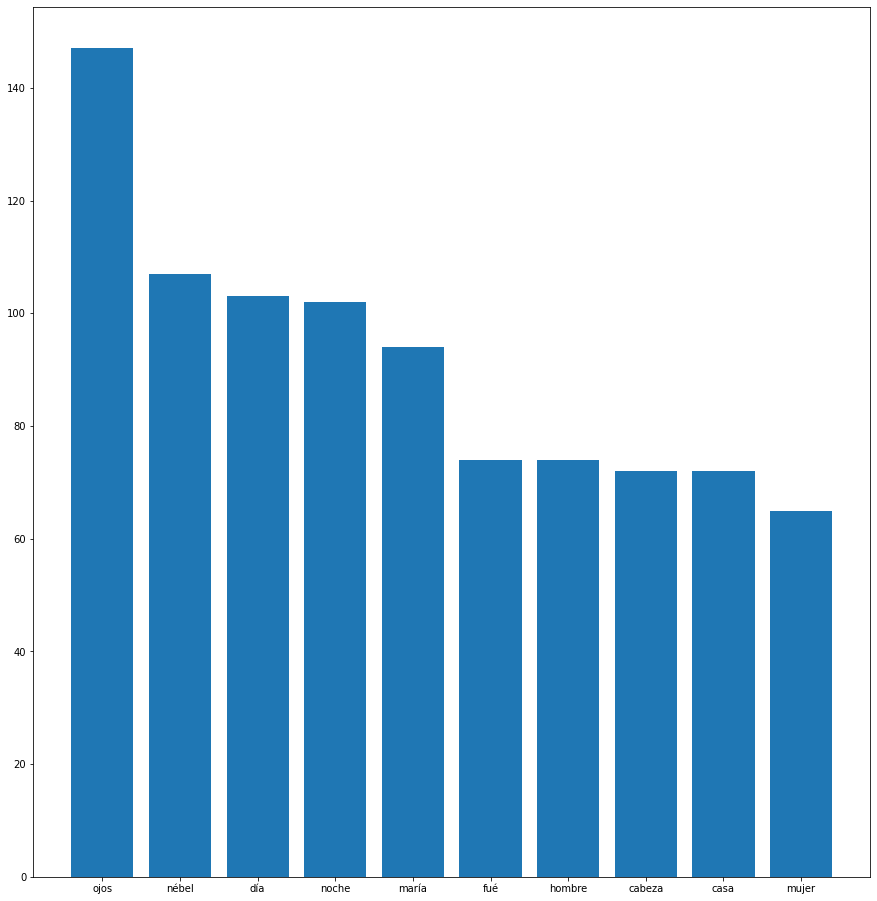

In [81]:
# 4. 
fig, ax = plt.subplots(figsize=(15,16))
plt.bar(x[:10], y[:10])
plt.show()

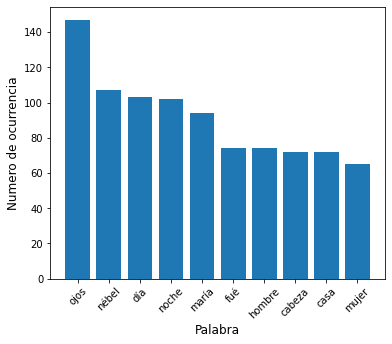

In [82]:
# 5.
fig, ax = plt.subplots(figsize=(6,5))
plt.bar(x[:10], y[:10])
ax.set_ylabel('Numero de ocurrencia', fontsize=12)
ax.set_xlabel('Palabra', fontsize=12)
ax.xaxis.set_tick_params(rotation=45)
plt.show()

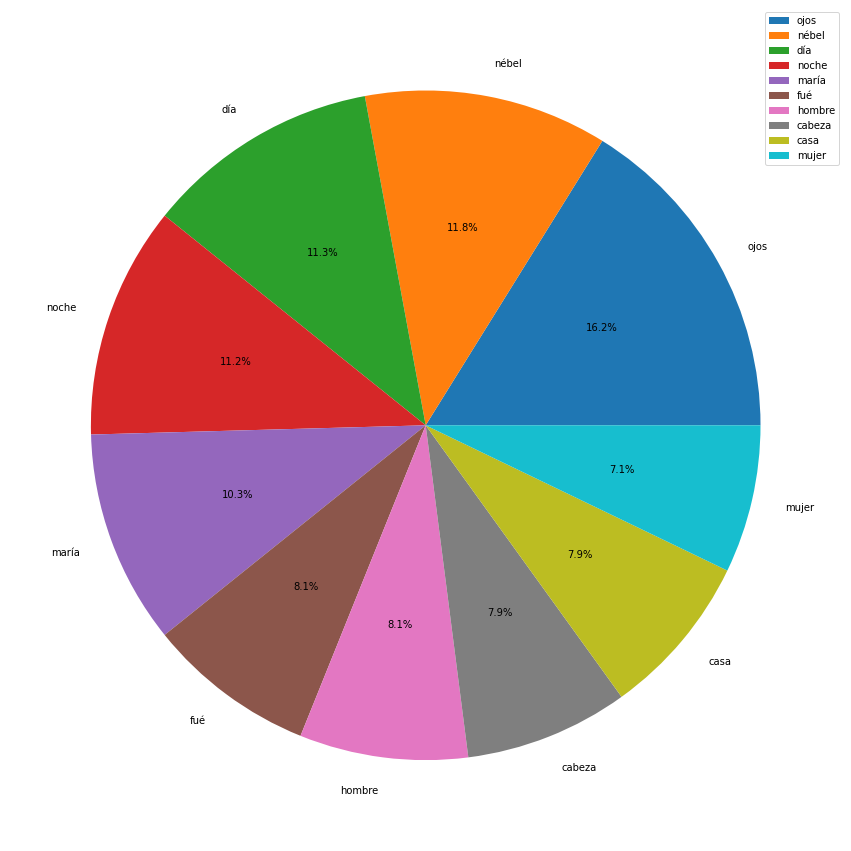

In [83]:
# 6. 
fig, ax = plt.subplots(figsize=(15,16))
y = y[:10]
x = x[:10]
plt.pie(y, labels = x, autopct = '%1.1f%%')
plt.legend()
plt.show() 